In [1]:
%cd /content/drive/MyDrive/Colab/naampy/

/content/drive/MyDrive/Colab/naampy


In [2]:
%ls

'Copy of train_custom.ipynb'   model.h5             train_final.ipynb
 data/                         model.png            train.ipynb
 data.ipynb                    saved_model/         train_rmse.ipynb
 data_with_prop.ipynb          train_custom.ipynb   train_with_prop.ipynb


In [3]:
import pandas as pd
import numpy as np
import time

from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer


import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt

# Import data

In [4]:
df = pd.read_csv('data/naampy_final_prop_weights.csv')

In [5]:
df.head()

,first_name,gender,female_prop,pop_weight
0,aa,male,0.044734,4.058690e-05
1,aaa,male,0.260188,6.109486e-07
2,aaaa,female,0.742647,2.604671e-07
3,aaaamsoo,female,0.675344,3.899346e-06
4,aaaan,male,0.029126,1.972655e-07


In [6]:
df[df['first_name'].str.len() <= 2]

,first_name,gender,female_prop,pop_weight
0,aa,male,0.044734,4.058690e-05
3610,ab,male,0.311203,9.231260e-07
4358,ac,male,0.442623,3.504815e-07
4956,ag,male,0.300971,1.972655e-07
5153,ah,male,0.361169,9.173804e-07
...,...,...,...,...
196973,ys,male,0.445378,2.279087e-07
196974,yu,male,0.325714,3.351599e-07
197228,zd,male,0.430876,8.311965e-07
197247,zk,female,0.519231,2.987711e-07


In [7]:
df = df.drop(df[df['first_name'].str.len() <= 2].index)

In [8]:
df['pop_weight'].sum()

0.9994708955644319

In [9]:
df[df['first_name'].str.len() >= 20]

,first_name,gender,female_prop,pop_weight
21685,bhaanaabhagavaanavaalaa,male,0.491620,3.428207e-07
21746,bhaanooprathaapasimh,male,0.000000,4.175134e-07
22339,bhagaaouatheeprasaad,male,0.000000,2.681279e-07
32420,chandrakaamthaabaaee,female,1.000000,2.470607e-07
32429,chandrakaanthaabaaee,female,1.000000,2.298239e-07
32560,chandrasekharannayar,male,0.009174,2.087567e-07
56644,gopalakrishnakkurupp,male,0.000000,2.968559e-07
56647,gopalakrishnanachari,male,0.000000,3.179231e-07
90217,krishnaprathaapasimh,male,0.000000,2.642975e-07
91115,kumarakhaaneeyaasaaparaa,male,0.458065,2.968559e-07


In [10]:
def find_seq_chars(s, seq_len=2):
  prev = ""
  count = 1
  match = False
  for i in s:
    if i == prev:
      count += 1
    else:
      count = 1
    
    prev = i
    if count == seq_len:
      return True
  return match

In [11]:
df[df['first_name'].apply(lambda x : find_seq_chars(x, 3))]

,first_name,gender,female_prop,pop_weight
1,aaa,male,0.260188,6.109486e-07
2,aaaa,female,0.742647,2.604671e-07
3,aaaamsoo,female,0.675344,3.899346e-06
4,aaaan,male,0.029126,1.972655e-07
5,aaab,male,0.053333,2.872799e-07
...,...,...,...,...
196434,yeeelavaad,male,0.472603,2.796191e-07
196808,yoogamaaaa,female,0.996219,1.013140e-06
197076,yuliaaa,female,0.995633,4.385806e-07
197109,yuriaaa,male,0.239175,9.288716e-07


In [12]:
df = df.drop(df[df['first_name'].apply(lambda x : find_seq_chars(x, 3))].index)

In [13]:
df.shape

(195979, 4)

In [14]:
import re
def find_numbers(x):
  return len(re.findall('[0-9]+', x)) > 0

df[df['first_name'].apply(lambda x: find_numbers(x))]

,first_name,gender,female_prop,pop_weight


In [15]:
df.head()

,first_name,gender,female_prop,pop_weight
179,aab,male,0.292818,6.933021e-07
180,aabaa,male,0.351738,9.365324e-07
181,aabaad,male,0.047183,4.180880e-06
182,aabaadaa,female,0.983333,2.298239e-07
183,aabaadaar,female,0.515075,7.622493e-07


In [16]:
df.shape

(195979, 4)

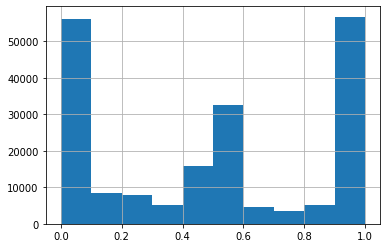

In [17]:
df['female_prop'].hist()

In [18]:
df['log_weights'] = -np.log(df['pop_weight'])

In [19]:
df.head()

,first_name,gender,female_prop,pop_weight,log_weights
179,aab,male,0.292818,6.933021e-07,14.181800
180,aabaa,male,0.351738,9.365324e-07,13.881082
181,aabaad,male,0.047183,4.180880e-06,12.384989
182,aabaadaa,female,0.983333,2.298239e-07,15.285952
183,aabaadaar,female,0.515075,7.622493e-07,14.086992


# Split data

In [20]:
X = df['first_name'].values
y = df['female_prop'].values
w = df['pop_weight'].values

In [21]:
X_train, X_rem, y_train, y_rem, w_train, w_rem = train_test_split(X, y, w, test_size=0.3, random_state=42, shuffle=True)

In [22]:
X_train.size

137185

In [23]:
X_rem.size

58794

In [24]:
w_train.size

137185

In [25]:
X_val, X_test, y_val, y_test, w_val, w_test = train_test_split(X_rem, y_rem, w_rem, test_size=0.5)

In [26]:
y_train[1]

0.5302013422818792

In [27]:
X_train[1]

'bhakathi'

In [28]:
w_train[1]

2.85364687979521e-07

# Tokenization

In [29]:
tk = Tokenizer(num_words=None, char_level=True, oov_token='UNK')

In [30]:
tk.fit_on_texts(df['first_name'].values)

In [31]:
alphabet="abcdefghijklmnopqrstuvwxyz"
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1

In [32]:
char_dict

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [33]:
# Use char_dict to replace the tk.word_index
tk.word_index = char_dict.copy() 
# Add 'UNK' to the vocabulary 
tk.word_index[tk.oov_token] = max(char_dict.values()) + 1

In [34]:
tk.word_index

{'UNK': 27,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [35]:
df['first_name'].str.len().max()

24

In [36]:
train_sequences = tk.texts_to_sequences(X_train)

In [37]:
train_sequences[0]

[11, 1, 4, 1, 14, 15, 15, 18]

In [38]:
X_train[0]

'kadanoor'

In [39]:
validation_sequences = tk.texts_to_sequences(X_val)
test_sequences = tk.texts_to_sequences(X_test)

In [40]:
# Padding
X_train = pad_sequences(train_sequences, maxlen=24, padding='post')
X_val = pad_sequences(validation_sequences, maxlen=24, padding='post')
X_test = pad_sequences(test_sequences, maxlen=24, padding='post')

In [41]:
X_train[0]

array([11,  1,  4,  1, 14, 15, 15, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0], dtype=int32)

# Creating Dataset

In [42]:
BATCH_SIZE = 64
BUFFER_SIZE = 200000

In [43]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train, w_train))
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val, w_val))
val_dataset = val_dataset.batch(BATCH_SIZE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test, w_test))
test_dataset = test_dataset.batch(BATCH_SIZE)

In [44]:
text_batch, label_batch, weight_batch = next(iter(train_dataset))
first_name, gender_label, weight = text_batch[0], label_batch[0], weight_batch[0]
print("Name", first_name)
print("Label", gender_label)
print("Weight", weight)

Name tf.Tensor([13 15 15 10  1 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0], shape=(24,), dtype=int32)
Label tf.Tensor(0.3808219178082191, shape=(), dtype=float64)
Weight tf.Tensor(1.3980954511748345e-06, shape=(), dtype=float64)


# Vectorization

In [45]:
vocab_size = len(tk.word_index)
vocab_size

27

In [46]:
embedding_weights = [] 
embedding_weights.append(np.zeros(vocab_size)) # first row is pad

for char, i in tk.word_index.items(): 
    onehot = np.zeros(vocab_size)
    onehot[i-1] = 1
    embedding_weights.append(onehot)
embedding_weights = np.array(embedding_weights)

In [47]:
print(embedding_weights.shape) # first row all 0 for PAD, 26 char, last row for UNK
embedding_weights

(28, 27)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [48]:
# max length of first name 
input_size = 24
# vocab_size = 27
embedding_size = 27
conv_layers = [[128, 7, 3], 
               [128, 3, -1], 
               [128, 3, -1]]

fully_connected_layers = [512, 512]
dropout_p = 0.5

In [49]:
# Embedding layer Initialization
embedding_layer = tf.keras.layers.Embedding(vocab_size+1, 
                            embedding_size,
                            input_length=input_size,
                            weights=[embedding_weights])

# Model

In [50]:
def create_model():
    # Input
  inputs = tf.keras.layers.Input(shape=(input_size,), name='input', dtype='int64')  # shape=(?, 24)
  # Embedding 
  x = embedding_layer(inputs)

  # Conv 
  for filter_num, filter_size, pooling_size in conv_layers:
      x = tf.keras.layers.Conv1D(filter_num, filter_size)(x)
      x = tf.keras.layers.Activation('relu')(x)
      if pooling_size != -1:
          x = tf.keras.layers.MaxPooling1D(pool_size=pooling_size)(x) # Final shape=(None, 34, 256)
  x = tf.keras.layers.Flatten()(x) # (None, 8704)
  # Fully connected layers 
  for dense_size in fully_connected_layers:
      x = tf.keras.layers.Dense(dense_size, activation='relu')(x) # dense_size == 1024
      x = tf.keras.layers.Dropout(dropout_p)(x)
  # Output Layer
  predictions = tf.keras.layers.Dense(1,activation="sigmoid")(x)
  # Build model
  return tf.keras.models.Model(inputs=inputs, outputs=predictions)

In [51]:
model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 27)            756       
                                                                 
 conv1d (Conv1D)             (None, 18, 128)           24320     
                                                                 
 activation (Activation)     (None, 18, 128)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 128)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 4, 128)            49280     
                                                             

# RMSE without weights on loss and metric

In [52]:
class RootMeanSquaredError(tf.keras.losses.Loss):
  def __init__(self,
                reduction=tf.keras.losses.Reduction.AUTO,
                name='RootMeanSquaredError'):
      super(RootMeanSquaredError, self).__init__(reduction=reduction, name=name)

  def __call__(self, y_true, y_pred, sample_weight):
    return tf.sqrt(super().__call__(y_true, y_pred, 1))

  def call(self, y_true, y_pred):
    return tf.keras.losses.mean_squared_error(y_true, y_pred)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.06), 
              loss=RootMeanSquaredError(), 
              metrics=[tf.keras.metrics.RootMeanSquaredError()])

# NO weights on loss - rmse

batch_size = 64
epochs = 50

earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_root_mean_squared_error',
    mode = 'min',
    verbose = 1,
    patience = 10,
    restore_best_weights = True)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[earlystopping_cb])

Epoch 1/50
2144/2144 [==============================] - 22s 5ms/step - loss: 0.3386 - root_mean_squared_error: 0.3412 - val_loss: 0.3000 - val_root_mean_squared_error: 0.3012
Epoch 2/50
2144/2144 [==============================] - 10s 5ms/step - loss: 0.2755 - root_mean_squared_error: 0.2770 - val_loss: 0.2594 - val_root_mean_squared_error: 0.2611
Epoch 3/50
2144/2144 [==============================] - 10s 4ms/step - loss: 0.2566 - root_mean_squared_error: 0.2582 - val_loss: 0.3044 - val_root_mean_squared_error: 0.3062
Epoch 4/50
2144/2144 [==============================] - 10s 5ms/step - loss: 0.2463 - root_mean_squared_error: 0.2480 - val_loss: 0.2507 - val_root_mean_squared_error: 0.2525
Epoch 5/50
2144/2144 [==============================] - 10s 5ms/step - loss: 0.2390 - root_mean_squared_error: 0.2408 - val_loss: 0.2491 - val_root_mean_squared_error: 0.2509
Epoch 6/50
2144/2144 [==============================] - 10s 5ms/step - loss: 0.2334 - root_mean_squared_error: 0.2352 - val_l

In [54]:
root_mean_squared_loss, root_mean_squared_error = model.evaluate(test_dataset)

print("RMSE Loss without weights: ", root_mean_squared_loss)
print("RMSE Metric without weights: ", root_mean_squared_error)

460/460 [==============================] - 1s 3ms/step - loss: 0.2190 - root_mean_squared_error: 0.2213
RMSE Loss without weights:  0.21903139352798462
RMSE Metric without weights:  0.2212539166212082


# Save, Load & Test

In [55]:
model.save('saved_model/naampy_rmse_no_weights')

INFO:tensorflow:Assets written to: saved_model/naampy_rmse_no_weights/assets


# Plot

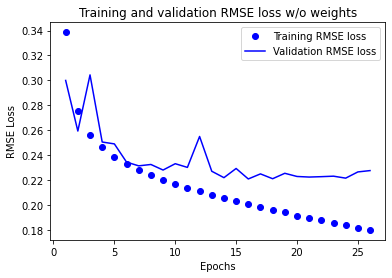

In [56]:
history_dict = history.history
history_dict.keys()

rmse = history_dict['root_mean_squared_error']
val_rmse = history_dict['val_root_mean_squared_error']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(rmse) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training RMSE loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation RMSE loss')
plt.title('Training and validation RMSE loss w/o weights')
plt.xlabel('Epochs')
plt.ylabel('RMSE Loss')
plt.legend()

plt.show()

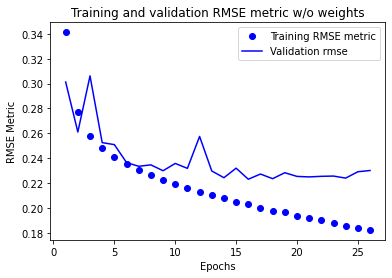

In [57]:
plt.plot(epochs, rmse, 'bo', label='Training RMSE metric')
plt.plot(epochs, val_rmse, 'b', label='Validation rmse')
plt.title('Training and validation RMSE metric w/o weights')
plt.xlabel('Epochs')
plt.ylabel('RMSE Metric')
plt.legend()

plt.show()

# RMSE with weights on loss and metric

In [58]:
# recreate model
model = create_model()

In [59]:
class WeightedRootMeanSquaredError(tf.keras.losses.Loss):
  def __init__(self,
                reduction=tf.keras.losses.Reduction.AUTO,
                name='WeightedRootMeanSquaredError'):
      super(WeightedRootMeanSquaredError, self).__init__(reduction=reduction, name=name)

  def num_of_elements(self, sample_weight):
    return tf.size(sample_weight).numpy()
    
  def __call__(self, y_true, y_pred, sample_weight):
    #return super().__call__(y_true, y_pred, 1)
    # 1/n *  sum(weights * mse(y_p - y_t))
    actual_loss = super().__call__(y_true, y_pred, sample_weight)
    num_of_el = tf.py_function(func=self.num_of_elements, inp = [sample_weight], Tout=tf.float32)

    # dividing by sum of all weights in this batch
    # (sum(weights * mse(y_p - y_t))) / sum(weights)
    wmse_loss = actual_loss * (num_of_el / tf.math.reduce_sum(sample_weight))
    return tf.sqrt(wmse_loss)

  def call(self, y_true, y_pred):
    return tf.keras.losses.mean_squared_error(y_true, y_pred)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.06), 
              loss=WeightedRootMeanSquaredError(), 
              weighted_metrics=[tf.keras.metrics.RootMeanSquaredError()])

# weights on loss - rmse

batch_size = 64
epochs = 50

earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_root_mean_squared_error',
    mode = 'min',
    verbose = 1,
    patience = 10,
    restore_best_weights = True)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[earlystopping_cb])

Epoch 1/50
2144/2144 [==============================] - 12s 5ms/step - loss: 0.3243 - root_mean_squared_error: 0.3277 - val_loss: 0.2793 - val_root_mean_squared_error: 0.3007
Epoch 2/50
2144/2144 [==============================] - 11s 5ms/step - loss: 0.2619 - root_mean_squared_error: 0.2665 - val_loss: 0.2521 - val_root_mean_squared_error: 0.2796
Epoch 3/50
2144/2144 [==============================] - 11s 5ms/step - loss: 0.2439 - root_mean_squared_error: 0.2436 - val_loss: 0.2452 - val_root_mean_squared_error: 0.2675
Epoch 4/50
2144/2144 [==============================] - 11s 5ms/step - loss: 0.2316 - root_mean_squared_error: 0.2349 - val_loss: 0.2481 - val_root_mean_squared_error: 0.2707
Epoch 5/50
2144/2144 [==============================] - 12s 5ms/step - loss: 0.2225 - root_mean_squared_error: 0.2212 - val_loss: 0.2292 - val_root_mean_squared_error: 0.2518
Epoch 6/50
2144/2144 [==============================] - 11s 5ms/step - loss: 0.2130 - root_mean_squared_error: 0.2054 - val_l

# Evaluate

In [60]:
root_mean_squared_loss, root_mean_squared_error = model.evaluate(test_dataset)

print("RMSE Loss with weights: ", root_mean_squared_loss)
print("RMSE Metric with weights: ", root_mean_squared_error)

460/460 [==============================] - 1s 3ms/step - loss: 0.2165 - root_mean_squared_error: 0.2223
RMSE Loss with weights:  0.21645867824554443
RMSE Metric with weights:  0.2223343402147293


# Save model

In [61]:
model.save('saved_model/naampy_rmse_with_weights')

INFO:tensorflow:Assets written to: saved_model/naampy_rmse_with_weights/assets


# Plot

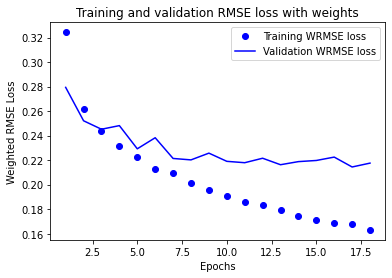

In [62]:
history_dict = history.history
history_dict.keys()

rmse = history_dict['root_mean_squared_error']
val_rmse = history_dict['val_root_mean_squared_error']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(rmse) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training WRMSE loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation WRMSE loss')
plt.title('Training and validation RMSE loss with weights')
plt.xlabel('Epochs')
plt.ylabel('Weighted RMSE Loss')
plt.legend()

plt.show()

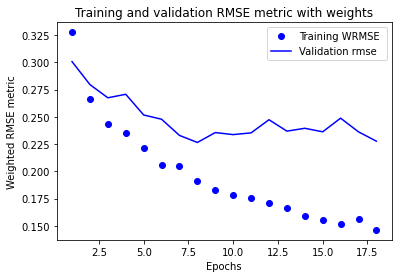

In [63]:
plt.plot(epochs, rmse, 'bo', label='Training WRMSE ')
plt.plot(epochs, val_rmse, 'b', label='Validation rmse')
plt.title('Training and validation RMSE metric with weights')
plt.xlabel('Epochs')
plt.ylabel('Weighted RMSE metric')
plt.legend()

plt.show()

# MSE without weights at loss and metric

In [64]:
# recreate model
model = create_model()

class MeanSquaredError(tf.keras.losses.Loss):
  def __init__(self,
                reduction=tf.keras.losses.Reduction.AUTO,
                name='MeanSquaredError'):
      super(MeanSquaredError, self).__init__(reduction=reduction, name=name)

  def num_of_elements(self, sample_weight):
    return tf.size(sample_weight).numpy()
    
  def __call__(self, y_true, y_pred, sample_weight):
    return super().__call__(y_true, y_pred, 1)

  def call(self, y_true, y_pred):
    return tf.keras.losses.mean_squared_error(y_true, y_pred)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.06), 
              loss=MeanSquaredError(), 
              metrics=[tf.keras.metrics.MeanSquaredError()])

batch_size = 64
epochs = 50

earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_mean_squared_error',
    mode = 'min',
    verbose = 1,
    patience = 10,
    restore_best_weights = True)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[earlystopping_cb])

Epoch 1/50
2144/2144 [==============================] - 11s 5ms/step - loss: 0.1121 - mean_squared_error: 0.1121 - val_loss: 0.0813 - val_mean_squared_error: 0.0813
Epoch 2/50
2144/2144 [==============================] - 10s 5ms/step - loss: 0.0760 - mean_squared_error: 0.0760 - val_loss: 0.0761 - val_mean_squared_error: 0.0761
Epoch 3/50
2144/2144 [==============================] - 10s 5ms/step - loss: 0.0670 - mean_squared_error: 0.0670 - val_loss: 0.0653 - val_mean_squared_error: 0.0653
Epoch 4/50
2144/2144 [==============================] - 10s 5ms/step - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.0616 - val_mean_squared_error: 0.0616
Epoch 5/50
2144/2144 [==============================] - 10s 4ms/step - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.0573 - val_mean_squared_error: 0.0573
Epoch 6/50
2144/2144 [==============================] - 10s 4ms/step - loss: 0.0559 - mean_squared_error: 0.0559 - val_loss: 0.0583 - val_mean_squared_error: 0.0583
Epoch 7/50

# Evaluate

In [65]:
mean_squared_loss, mean_squared_error = model.evaluate(test_dataset)

print("MSE Loss with weights: ", mean_squared_loss)
print("MSE Metric with weights: ", mean_squared_error)

460/460 [==============================] - 1s 2ms/step - loss: 0.0497 - mean_squared_error: 0.0497
MSE Loss with weights:  0.04974181950092316
MSE Metric with weights:  0.04974181950092316


# Save Model

In [66]:
model.save('saved_model/naampy_mse_no_weights')

INFO:tensorflow:Assets written to: saved_model/naampy_mse_no_weights/assets


# MSE with weights at loss and metric

In [67]:
# recreate model
model = create_model()

class WeightedMeanSquaredError(tf.keras.losses.Loss):
  def __init__(self,
                reduction=tf.keras.losses.Reduction.AUTO,
                name='WeightedMeanSquaredError'):
      super(WeightedMeanSquaredError, self).__init__(reduction=reduction, name=name)

  def num_of_elements(self, sample_weight):
    return tf.size(sample_weight).numpy()
    
  def __call__(self, y_true, y_pred, sample_weight):
    #return super().__call__(y_true, y_pred, 1)
    # 1/n *  sum(weights * mse(y_p - y_t))
    actual_loss = super().__call__(y_true, y_pred, sample_weight)
    num_of_el = tf.py_function(func=self.num_of_elements, inp = [sample_weight], Tout=tf.float32)

    # dividing by sum of all weights in this batch
    # (sum(weights * mse(y_p - y_t))) / sum(weights)
    wmse_loss = actual_loss * (num_of_el / tf.math.reduce_sum(sample_weight))
    return wmse_loss

  def call(self, y_true, y_pred):
    return tf.keras.losses.mean_squared_error(y_true, y_pred)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.06), 
              loss=WeightedMeanSquaredError(), 
              weighted_metrics=[tf.keras.metrics.MeanSquaredError()])

batch_size = 64
epochs = 50

earlystopping_cb = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_mean_squared_error',
    mode = 'min',
    verbose = 1,
    patience = 10,
    restore_best_weights = True)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[earlystopping_cb])

Epoch 1/50
2144/2144 [==============================] - 12s 5ms/step - loss: 0.1138 - mean_squared_error: 0.1118 - val_loss: 0.0825 - val_mean_squared_error: 0.0814
Epoch 2/50
2144/2144 [==============================] - 11s 5ms/step - loss: 0.0757 - mean_squared_error: 0.0698 - val_loss: 0.0731 - val_mean_squared_error: 0.0728
Epoch 3/50
2144/2144 [==============================] - 11s 5ms/step - loss: 0.0679 - mean_squared_error: 0.0622 - val_loss: 0.0664 - val_mean_squared_error: 0.0683
Epoch 4/50
2144/2144 [==============================] - 11s 5ms/step - loss: 0.0616 - mean_squared_error: 0.0541 - val_loss: 0.0761 - val_mean_squared_error: 0.0757
Epoch 5/50
2144/2144 [==============================] - 11s 5ms/step - loss: 0.0566 - mean_squared_error: 0.0487 - val_loss: 0.0628 - val_mean_squared_error: 0.0650
Epoch 6/50
2144/2144 [==============================] - 12s 5ms/step - loss: 0.0527 - mean_squared_error: 0.0444 - val_loss: 0.0607 - val_mean_squared_error: 0.0639
Epoch 7/50

# Evaluate

In [68]:
mean_squared_loss, mean_squared_error = model.evaluate(test_dataset)

print("MSE Loss with weights: ", mean_squared_loss)
print("MSE Metric with weights: ", mean_squared_error)

460/460 [==============================] - 1s 3ms/step - loss: 0.0502 - mean_squared_error: 0.0433
MSE Loss with weights:  0.0501617006957531
MSE Metric with weights:  0.043311625719070435


# Save

In [69]:
model.save('saved_model/naampy_mse_with_weights')

INFO:tensorflow:Assets written to: saved_model/naampy_mse_with_weights/assets


# Plot

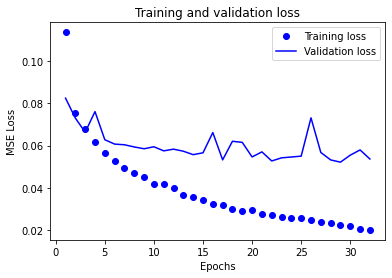

In [70]:
history_dict = history.history
history_dict.keys()

rmse = history_dict['mean_squared_error']
val_rmse = history_dict['val_mean_squared_error']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(rmse) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()

plt.show()

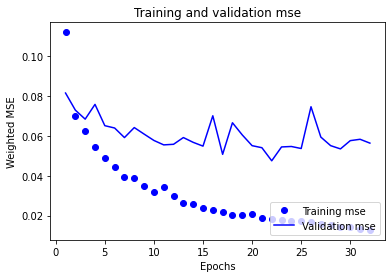

In [71]:
plt.plot(epochs, rmse, 'bo', label='Training mse')
plt.plot(epochs, val_rmse, 'b', label='Validation mse')
plt.title('Training and validation mse')
plt.xlabel('Epochs')
plt.ylabel('Weighted MSE')
plt.legend(loc='lower right')

plt.show()

# Inference

In [72]:
rmse_no_weights = tf.keras.models.load_model('saved_model/naampy_rmse_no_weights', compile=False)
rmse_with_weights = tf.keras.models.load_model('saved_model/naampy_rmse_with_weights', compile=False)

mse_no_weights = tf.keras.models.load_model('saved_model/naampy_mse_no_weights', compile=False)
mse_with_weights = tf.keras.models.load_model('saved_model/naampy_mse_with_weights', compile=False)

In [83]:
input = {
         "rajinikanth" : "male",
         "harvin" : "male",
         "shyamsingha" : "male",
         "kamalhasan" : "male",
         "srihan" : "male",
         "thammam" : "male",
         "rajarajeshwari" : "female",
         "shobby" : "male",
         "tamannaah bhatia" : "female",
         "mehreen" : "female",
         "kiara" : "female",
         "shivathmika" : "female",
         "komalee" : "female",
         "nazriya" : "female",
         "nabha" : "female",
         "taapsee" : "female",
         "parineeti" : "female",
         "katrina" : "female",
         "ileana" : "female",
         "vishwaksen" : "male",
         "sampoornesh" : "male",
         "hrithik" : "male",
         "emraan" : "male",
         "rajkummar" : "male",
         "sharman" : "male",
         "ayushmann" : "male",
         "irrfan" : "male",
         "riteish" : "male" 
}
sequences = tk.texts_to_sequences(list(input.keys()))
final = pad_sequences(sequences, maxlen=24, padding='post')

In [84]:
rmse_no_weights_res = rmse_no_weights.predict(final)
rmse_with_weights_res = rmse_with_weights.predict(final)

mse_no_weights_res = mse_no_weights.predict(final)
mse_with_weights_res = mse_with_weights.predict(final)

In [85]:
rmse_no_weights_pred = [p.item() for p in rmse_no_weights_res]
rmse_with_weights_pred = [p.item() for p in rmse_with_weights_res]

mse_no_weights_pred = [p.item() for p in mse_no_weights_res]
mse_with_weights_pred = [p.item() for p in mse_with_weights_res]

In [86]:
rmse_no_weights_pred_value = ['female' if p > 0.5 else 'male' for p in rmse_no_weights_pred]
rmse_with_weights_pred_value = ['female' if p > 0.5 else 'male' for p in rmse_with_weights_pred]

mse_no_weights_pred_value = ['female' if p > 0.5 else 'male' for p in mse_no_weights_pred]
mse_with_weights_pred_value = ['female' if p > 0.5 else 'male' for p in mse_with_weights_pred]

In [87]:
true_values = [input[k] for k in input]

In [88]:
result_df = pd.DataFrame({'First Name': list(input),
                          'Truth': true_values,
                          'RMSE no weights': rmse_no_weights_pred_value,
                          'RMSE with weights': rmse_with_weights_pred_value,
                          'MSE no weights': mse_no_weights_pred_value,
                          'MSE with weights': mse_with_weights_pred_value,
                          'RMSE no weights female prob': rmse_no_weights_pred,
                          'RMSE with weights female prob': rmse_with_weights_pred,
                          'MSE no weights female prob': mse_no_weights_pred,
                          'MSE with weights female prob': mse_with_weights_pred
                          })

In [89]:
result_df

,First Name,Truth,RMSE no weights,RMSE with weights,MSE no weights,MSE with weights,RMSE no weights female prob,RMSE with weights female prob,MSE no weights female prob,MSE with weights female prob
0,rajinikanth,male,male,male,male,male,0.010357,0.035804,0.044449,0.029589
1,harvin,male,male,male,male,male,0.184709,0.343594,0.213235,0.032010
2,shyamsingha,male,male,male,male,male,0.042174,0.213203,0.116363,0.059889
3,kamalhasan,male,male,male,male,male,0.018840,0.015517,0.024505,0.006422
4,srihan,male,male,male,male,male,0.216363,0.218710,0.199144,0.132060
5,thammam,male,male,male,female,female,0.497373,0.490238,0.586487,0.577549
6,rajarajeshwari,female,female,male,female,female,0.992742,0.118294,0.925029,0.791036
7,shobby,male,female,male,male,female,0.606668,0.197228,0.350968,0.773482
8,tamannaah bhatia,female,female,male,male,female,0.671328,0.256680,0.252334,0.907502
9,mehreen,female,female,female,female,male,0.829583,0.725130,0.916276,0.448206


In [91]:
rmse_no_weights.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.06), 
              loss=RootMeanSquaredError(), 
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
rmse_with_weights.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.06), 
              loss=WeightedRootMeanSquaredError(), 
              weighted_metrics=[tf.keras.metrics.RootMeanSquaredError()])
mse_no_weights.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.06), 
              loss=MeanSquaredError(), 
              metrics=[tf.keras.metrics.MeanSquaredError()])
mse_with_weights.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.06), 
              loss=WeightedMeanSquaredError(), 
              weighted_metrics=[tf.keras.metrics.MeanSquaredError()])


l1, m1 = rmse_no_weights.evaluate(test_dataset)
l2, m2 = rmse_with_weights.evaluate(test_dataset)
l3, m3 = mse_no_weights.evaluate(test_dataset)
l4, m4 = mse_with_weights.evaluate(test_dataset)

print(f"RMSE no weights - loss: {l1}, metric: {m1}")
print(f"RMSE with weights - loss: {l2}, metric: {m2}")
print(f"MSE no weights - loss: {l3}, metric: {m3}")
print(f"MSE with weights - loss: {l4}, metric: {m4}")

460/460 [==============================] - 2s 3ms/step - loss: 0.0502 - mean_squared_error: 0.0433
RMSE no weights - loss: 0.21903139352798462, metric: 0.2212539166212082
RMSE with weights - loss: 0.21645867824554443, metric: 0.2223343402147293
MSE no weights - loss: 0.04974181950092316, metric: 0.04974181950092316
MSE with weights - loss: 0.0501617006957531, metric: 0.043311625719070435
